In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1️⃣ 데이터 로드 및 기본 정보 확인
- 데이터 크기 확인 (shape)
- 결측값 및 데이터 타입 확인 (info, isnull().sum())

In [13]:

data_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Attrition 변수 변환 (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

print(df.isnull().sum())
print(df.shape)
df


    
# 8:2 비율로 train/test 분리
split_index = int(10000 * 0.8)  # 8000번째 행까지 Train, 나머지 Test

# Split 컬럼 추가
df["Split"] = ["Train"] * split_index + ["Test"] * (10000 - split_index)

df.shape
df

df.to_csv('WA_Fn-UseC_-HR-Employee-Attrition_encoding.csv', index=False, encoding="utf-8")


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### 2️⃣ 데이터 분포 확인
- 수치형 변수의 분포 (hist, boxplot)
- 범주형 변수의 분포 (value_counts, countplot)

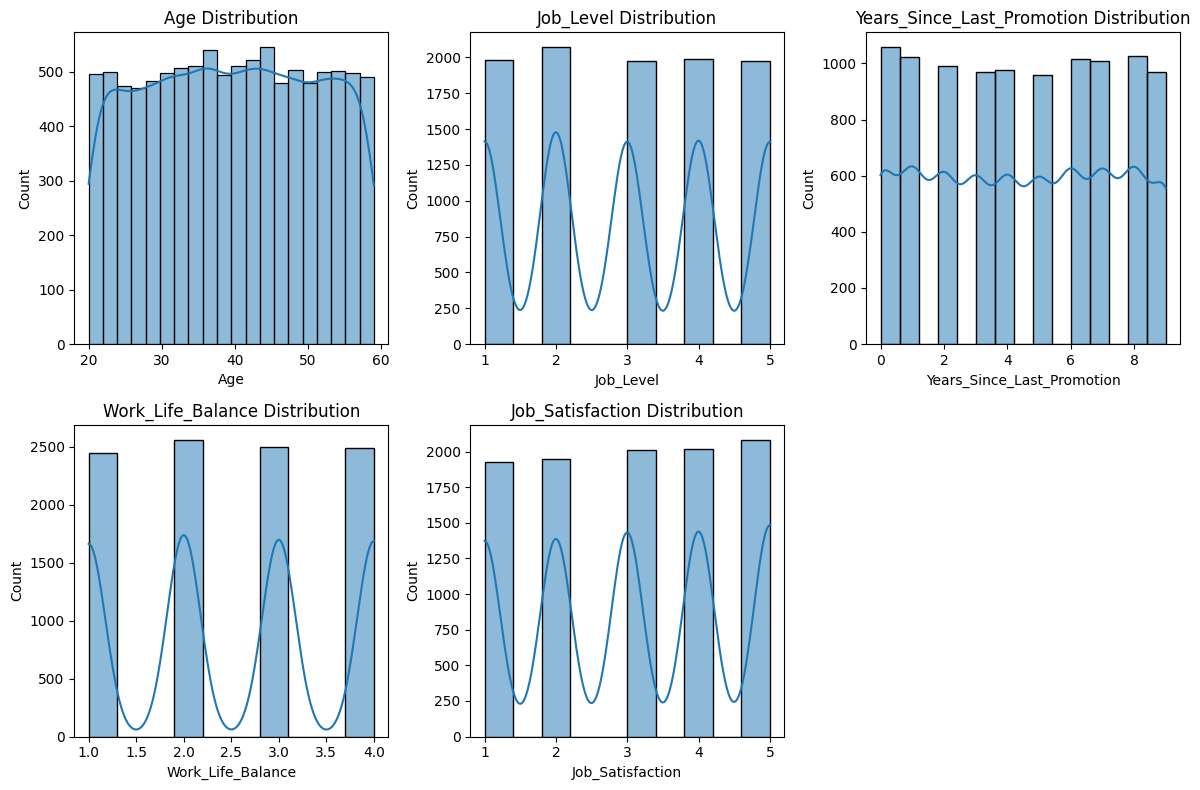

In [4]:
# 수치형 변수
plt.figure(figsize=(12, 8))

# 'Age' 변수
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')

# 'Job_Level' 변수
plt.subplot(2, 3, 2)
sns.histplot(df['Job_Level'], kde=True, bins=10)
plt.title('Job_Level Distribution')

# 'Years_Since_Last_Promotion' 변수
plt.subplot(2, 3, 3)
sns.histplot(df['Years_Since_Last_Promotion'], kde=True, bins=15)
plt.title('Years_Since_Last_Promotion Distribution')

# 'Work_Life_Balance' 변수
plt.subplot(2, 3, 4)
sns.histplot(df['Work_Life_Balance'], kde=True, bins=10)
plt.title('Work_Life_Balance Distribution')

# 'Job_Satisfaction' 변수
plt.subplot(2, 3, 5)
sns.histplot(df['Job_Satisfaction'], kde=True, bins=10)
plt.title('Job_Satisfaction Distribution')

plt.tight_layout()
plt.show()

### 3️⃣ 변수 간 관계 분석
- 상관 관계 분석 (corr, heatmap)
- 주요 변수들 간 관계 (pairplot, scatterplot)

/tmp/ipykernel_449944/2525775108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


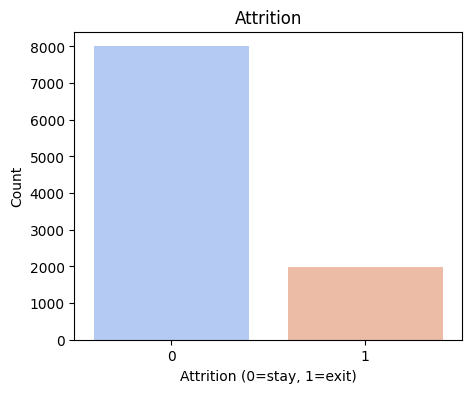

전체 직원 중 19.97%가 이탈함


In [5]:
# 이탈 여부 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition")
plt.xlabel("Attrition (0=stay, 1=exit)")
plt.ylabel("Count")
plt.show()

# 이탈률 계산
attrition_rate = df["Attrition"].mean() * 100
print(f"전체 직원 중 {attrition_rate:.2f}%가 이탈함")

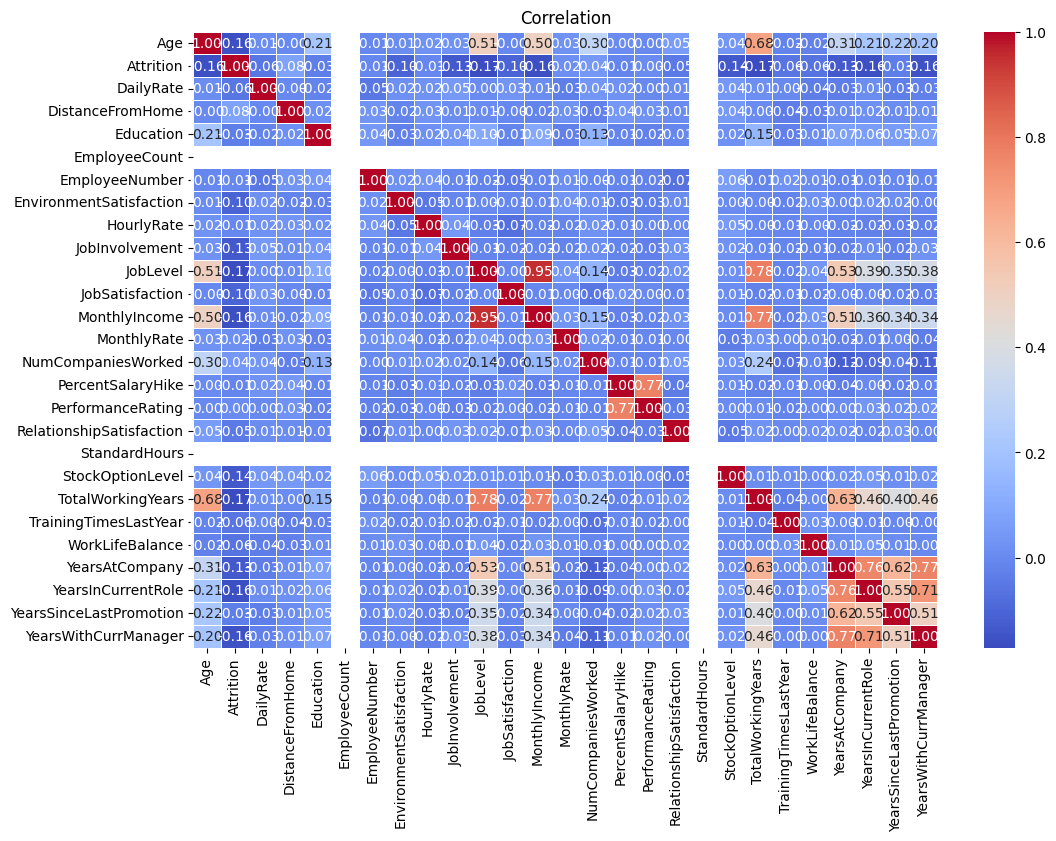

In [14]:
# 상관관계 분석
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation")
plt.show()

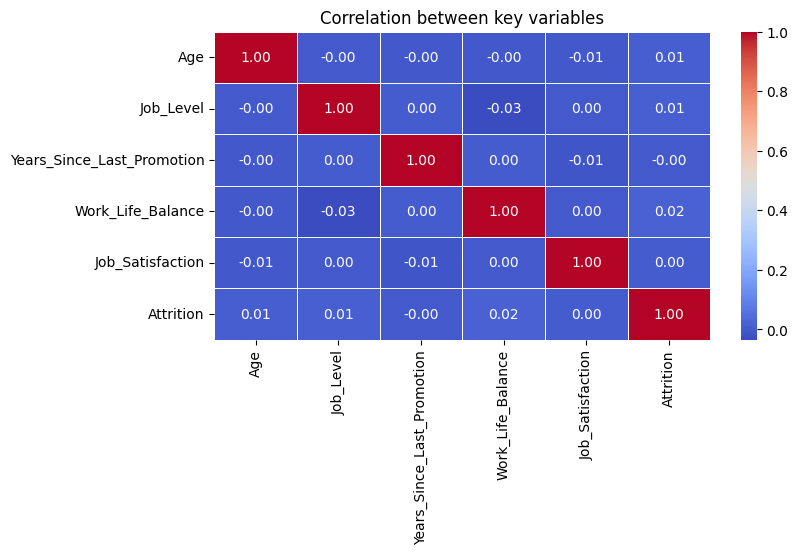

In [11]:
# X 변수와 타겟 변수 포함
df = df[['Age', 'Job_Level', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Attrition']]

# 상관행렬 계산
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between key variables")
plt.show()

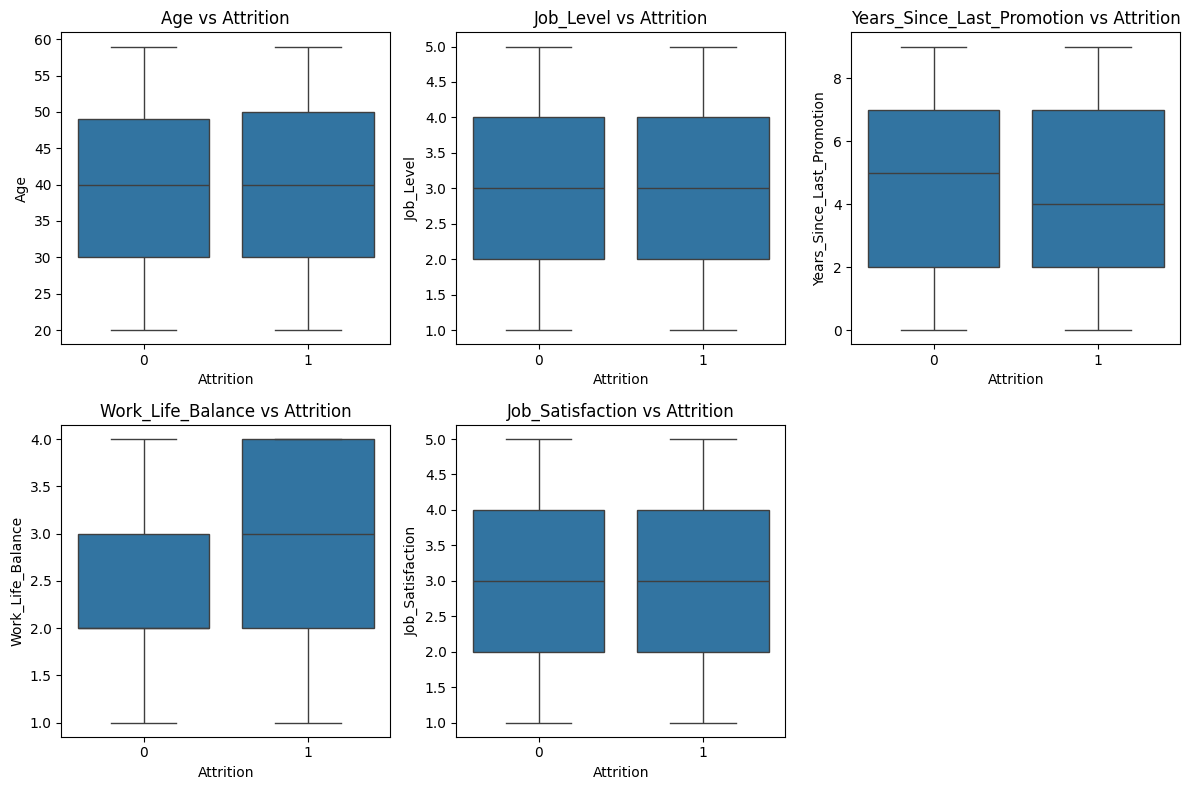

In [8]:
# 주요 변수들 간의 관계 분석
plt.figure(figsize=(12, 8))

# Age와 Attrition
plt.subplot(2, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')

# Job_Level과 Attrition
plt.subplot(2, 3, 2)
sns.boxplot(x='Attrition', y='Job_Level', data=df)
plt.title('Job_Level vs Attrition')

# Years_Since_Last_Promotion과 Attrition
plt.subplot(2, 3, 3)
sns.boxplot(x='Attrition', y='Years_Since_Last_Promotion', data=df)
plt.title('Years_Since_Last_Promotion vs Attrition')

# Work_Life_Balance와 Attrition
plt.subplot(2, 3, 4)
sns.boxplot(x='Attrition', y='Work_Life_Balance', data=df)
plt.title('Work_Life_Balance vs Attrition')

# Job_Satisfaction과 Attrition
plt.subplot(2, 3, 5)
sns.boxplot(x='Attrition', y='Job_Satisfaction', data=df)
plt.title('Job_Satisfaction vs Attrition')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

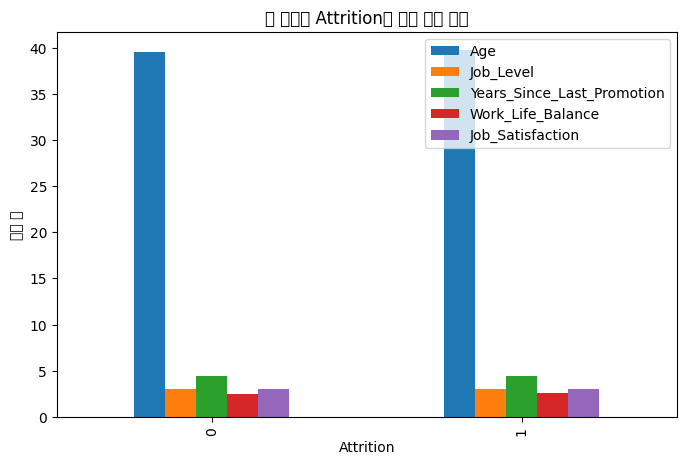

In [9]:
# 각 변수의 Attrition에 따른 평균 계산
mean_values = df.groupby('Attrition')[['Age', 'Job_Level', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction']].mean()

# 막대그래프 시각화
mean_values.plot(kind='bar', figsize=(8, 5))
plt.title('각 변수의 Attrition에 따른 평균 비교')
plt.ylabel('평균 값')
plt.show()

In [5]:
# 데이터 전처리
df

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,0
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,0
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,1
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,0
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,22,Female,Divorced,Marketing,Manager,5,4276,27,17,...,Yes,3,36,3,4,2,3,18,2,0
9996,9997,35,Female,Divorced,Marketing,Executive,3,10327,60,19,...,No,5,59,4,4,3,4,31,1,0
9997,9998,23,Male,Divorced,IT,Manager,3,12592,68,10,...,Yes,4,54,10,4,4,2,12,1,1
9998,9999,42,Female,Single,Marketing,Manager,3,9287,26,18,...,Yes,9,51,16,3,2,2,18,3,0
